<img src="Logo.png" width="100" align="left"/> 

# <center>Data Analytics project:</center>



Congratulations on finishing the lessons content for this second unit !

We have seen a lot of concepts in the second unit and we had the chance to test some of them. Now, we get to see how these different concepts are used to better understand our data.

## Some guidelines: 
1. To run a cell you can use the shortcut use : Shift + Enter

2. Only sections mentioned as To-Do are the places where you should put in your own code other than that we do not recommend that you change the provided code.

3. You will be graded for the visibility of your code so make sure you respect the correct indentation and that your code contains suitable variables names.

4. This notebook is designed in a sequential way so if you solve your project on different days make sure to run the previous cells before you can run the one you want.

5. Teacher assistants in the slack space remain available to answer any questions you might have.

>Best of luck ! 

## Project Sections:
In this project you will practice some of the concepts seen in the data analytics unit, you will deal with a real dataset. This dataset contains house sale prices for King County. It includes homes sold between May 2014 and May 2015.

Our goal is to analyze this dataset, clean it then create a simple linear regression model using it.

This project is devided into n sections : 
1. [Setting the environement](#set_env)

2. [Importing necessary tools](#importing)

3. [Dataset discovery](#dataset_discovery)

4. [NA handling](#na_handling)

5. [Useless variables deletion](#useless_var)

6. [Outliers detection](#outliers)

7. [Feature selection](#feature_selection)

8. [Linear regression](#linear_reg)

### 1. Setting the environement:  <a id='set_env'></a>

In [1]:
# Make sure you have virtualenv installed 
!pip install --user virtualenv

You should consider upgrading via the 'c:\users\crash\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
# To-Do: create a virtual environement called data_analytics
!python -m venv data_analytics

In [3]:
# Activate the environement for windows
!source data_analytics/bin/activate

'source' n?est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [4]:
# Activate the environement for linux (debian based)
!. data_analytics/bin/activate

'.' n?est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


### 2. Importing necessary tools:<a id='importing'></a>

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 3. Dataset discovery:<a id='dataset_discovery'></a>

In [726]:
# To-Do: Read the file ("kc_house_data.csv") using pandas and store in a dataframe called df
df=pd.read_csv("kc_house_data.csv")
# To-Do: Print the dataframe's shape
df.shape

(21613, 21)

In [727]:
# To-Do: Print the dataframe's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21606 non-null  object 
 2   price          21608 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21612 non-null  float64
 6   sqft_lot       21612 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21609 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21611 non-null  float64
 15  yr_renovated   21612 non-null  float64
 16  zipcode        21611 non-null  float64
 17  lat            21612 non-null  float64
 18  long  

### 4. NA handling:<a id='na_handling'></a>
It is clear after printing the dataset info that there are some variables that have less entries than the number of rows which means that some of them don't have values in certain rows.

Given the number of the na values, what do you think is the best method to deal with them?

In [728]:
# To-Do: deal with the NAs in your dataset in one line
#Since the number of NA values is very insignificant we can just delete the rows without having to worry about losing data
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21588 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21588 non-null  int64  
 1   date           21588 non-null  object 
 2   price          21588 non-null  float64
 3   bedrooms       21588 non-null  int64  
 4   bathrooms      21588 non-null  float64
 5   sqft_living    21588 non-null  float64
 6   sqft_lot       21588 non-null  float64
 7   floors         21588 non-null  float64
 8   waterfront     21588 non-null  int64  
 9   view           21588 non-null  int64  
 10  condition      21588 non-null  int64  
 11  grade          21588 non-null  int64  
 12  sqft_above     21588 non-null  float64
 13  sqft_basement  21588 non-null  int64  
 14  yr_built       21588 non-null  float64
 15  yr_renovated   21588 non-null  float64
 16  zipcode        21588 non-null  float64
 17  lat            21588 non-null  float64
 18  long  

As we can see we lost about 25 rows which isn't much

### 5. Useless variables deletion:<a id='useless_var'></a>
We want to eventually do a regression on it so naturally some variables bring no added value and can be delted without impacting the results.

Delete the column that correspond to variables that aren't needed.

In [729]:
# To-Do: delete the values of the variables that are useless
#These variables have been deemed unimportant and bring no information to the data so they will be deleted
df.drop(["id","date","zipcode"], axis=1, inplace=True)

In [730]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21588 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21588 non-null  float64
 1   bedrooms       21588 non-null  int64  
 2   bathrooms      21588 non-null  float64
 3   sqft_living    21588 non-null  float64
 4   sqft_lot       21588 non-null  float64
 5   floors         21588 non-null  float64
 6   waterfront     21588 non-null  int64  
 7   view           21588 non-null  int64  
 8   condition      21588 non-null  int64  
 9   grade          21588 non-null  int64  
 10  sqft_above     21588 non-null  float64
 11  sqft_basement  21588 non-null  int64  
 12  yr_built       21588 non-null  float64
 13  yr_renovated   21588 non-null  float64
 14  lat            21588 non-null  float64
 15  long           21588 non-null  float64
 16  sqft_living15  21588 non-null  float64
 17  sqft_lot15     21588 non-null  int64  
dtypes: flo

### A wild playground appears !!
In the next cell, go wild with the dataset discovery.
You can calculate the mean, the median or do anything you want to learn more the data.

<b>Pro tip :</b> 
Sometimes you might want to know how many unique variables a column has, to do so you can use the padas function :

<center>pd.unique(df['column_name'])</center>

In [731]:
# To-Do : get to know more your data WITHOUT modifying it !!


### 6.Outliers detection:<a id='outliers'></a>
Having outliers is a common problem that might affect the quality of the model that we're building.

Let's assume that we're not interested in very expensive or very cheap houses, we want a model that best fits the average priced houses.

To create such a model, we detect outliers and delete them using the Z-score method seen in the lessons.

In [732]:
# To-Do : detect the outliers then delete them and delete the column created to calculate the Z-score
df["price_zscore"]=(df.price-df.price.mean())/df.price.std()
df=df[abs(df["price_zscore"])<3.5] #this value was chosed by trial, and it gave us the best results
df.drop(["price_zscore"],axis=1, inplace=True)

In [733]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21308 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21308 non-null  float64
 1   bedrooms       21308 non-null  int64  
 2   bathrooms      21308 non-null  float64
 3   sqft_living    21308 non-null  float64
 4   sqft_lot       21308 non-null  float64
 5   floors         21308 non-null  float64
 6   waterfront     21308 non-null  int64  
 7   view           21308 non-null  int64  
 8   condition      21308 non-null  int64  
 9   grade          21308 non-null  int64  
 10  sqft_above     21308 non-null  float64
 11  sqft_basement  21308 non-null  int64  
 12  yr_built       21308 non-null  float64
 13  yr_renovated   21308 non-null  float64
 14  lat            21308 non-null  float64
 15  long           21308 non-null  float64
 16  sqft_living15  21308 non-null  float64
 17  sqft_lot15     21308 non-null  int64  
dtypes: flo

We can see that we lost about 200 more values which is relatively small considering how much data we have

### 7.Feature selection:<a id='feature_selection'></a>
It is clear that even after deleting some features, there might be other features that aren't obviously useless but can be delted and keep a good overall performance.

To verify this, we perform feature selection on our variables.

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.313913,0.503480,0.675169,0.095522,0.279011,0.120362,0.333288,0.038371,0.679073,0.578609,0.284243,0.061721,0.117579,0.372590,0.042450,0.600659,0.087850
bedrooms,0.313913,1.000000,0.507279,0.580084,0.030615,0.166189,-0.031448,0.058985,0.025632,0.343491,0.469627,0.294526,0.158545,0.012291,-0.014570,0.133664,0.381298,0.027786
bathrooms,0.503480,0.507279,1.000000,0.738569,0.081139,0.503108,0.013303,0.145588,-0.131571,0.645915,0.664268,0.253612,0.524054,0.041977,0.013619,0.235506,0.552674,0.082768
sqft_living,0.675169,0.580084,0.738569,1.000000,0.170944,0.351824,0.024445,0.232343,-0.066942,0.745089,0.866117,0.404285,0.340216,0.039923,0.039787,0.263516,0.754251,0.183985
sqft_lot,0.095522,0.030615,0.081139,0.170944,1.000000,-0.008894,0.021670,0.071536,-0.007022,0.106896,0.179954,0.010746,0.050931,0.007734,-0.088788,0.227619,0.145404,0.714942
floors,0.279011,0.166189,0.503108,0.351824,-0.008894,1.000000,0.007045,0.012112,-0.269060,0.458068,0.528873,-0.267927,0.496864,0.003332,0.046344,0.128757,0.275197,-0.014071
waterfront,0.120362,-0.031448,0.013303,0.024445,0.021670,0.007045,1.000000,0.338682,0.018662,0.018737,0.011203,0.028125,-0.039325,0.087640,-0.032245,-0.054970,0.030519,0.028859
view,0.333288,0.058985,0.145588,0.232343,0.071536,0.012112,0.338682,1.000000,0.041502,0.205186,0.118055,0.246141,-0.059593,0.095342,-0.006438,-0.079788,0.242801,0.069025
condition,0.038371,0.025632,-0.131571,-0.066942,-0.007022,-0.269060,0.018662,0.041502,1.000000,-0.154403,-0.169052,0.176182,-0.358445,-0.061433,-0.015983,-0.104687,-0.102265,-0.001976
grade,0.679073,0.343491,0.645915,0.745089,0.106896,0.458068,0.018737,0.205186,-0.154403,1.000000,0.739784,0.128400,0.464914,0.001683,0.106007,0.212044,0.701509,0.114642


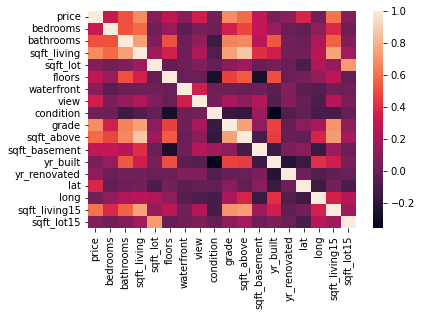

In [734]:
# To-Do : perform feature selection using correlation
corr=df.corr()
sns.heatmap(corr)
corr

In [735]:
# To-Do : drop the variables that seem highly correlated to you
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if abs(corr.iloc[i,j]) >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df = df[selected_columns]
#This code allows us to drop on of the features that are highly correlated with each other

In [736]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21308 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21308 non-null  float64
 1   bedrooms       21308 non-null  int64  
 2   bathrooms      21308 non-null  float64
 3   sqft_living    21308 non-null  float64
 4   sqft_lot       21308 non-null  float64
 5   floors         21308 non-null  float64
 6   waterfront     21308 non-null  int64  
 7   view           21308 non-null  int64  
 8   condition      21308 non-null  int64  
 9   grade          21308 non-null  int64  
 10  sqft_basement  21308 non-null  int64  
 11  yr_built       21308 non-null  float64
 12  yr_renovated   21308 non-null  float64
 13  lat            21308 non-null  float64
 14  long           21308 non-null  float64
 15  sqft_living15  21308 non-null  float64
 16  sqft_lot15     21308 non-null  int64  
dtypes: float64(10), int64(7)
memory usage: 2.9 MB


We can see that no variable was dropped and we still remain with too many variables and that's due to the fact that they are mostly poor correlated between them , and taking the correaltion limit to a number lower than 0.8 would mean losing too much information

### 8.Linear regression:<a id='linear_reg'></a>
Now that our data is clean and ready to be used, let's try to fit it into a linear regression model.

<ul>
    <li>We begin by splitting our variables into dependant and independant variables.</li>
    <li>We create the model using the LinearRegression class.</li>
    <li>We evaluate our model using the R² score</li>
</ul>

In [737]:
# Splitting the data into dependant and independant variables
Y = df['price']
X = df.drop(['price'],axis = 1) 

In [738]:
from sklearn.linear_model import LinearRegression
# To-Do : Create a linear regression model using the LinearRegression class then fit it to the data
model=LinearRegression()
result=model.fit(X,Y)

In [739]:
# The function used to calculate the R² score is the method "score" found in the LinearRegression class
result.score(X, Y) 

0.7116974244151302

We obtain an R² result of 0.7 which is mediocre and could be upgraded by adjusting some details , but given my experience this the best I could get it up to

## Conclusion:
Data preparation is a very important step in the machine learning pipeline. It is crucial to clean our data and understand it very well before we can create any model on the data.

In this notebook, we have spent 4 steps preparing our data but only 1 to create the model. This reflects how time consuming the process of data preparation is compared to the other steps as well as the importance of the quality of the data used.

In the next unit, we will see more about the models creation process and see a lot of important concepts in depth.